In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 98% !important }<style>"))

# Analysis

In [2]:
from utilities import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

In [3]:
pin_file = "../Data/pin.csv"

pin = read_pin(pin_file)

In [4]:
filename = "../Data/rssi4.csv"
B1 = "0117C55D14E4"

data = read_data(filename, B1)

All beacons: ['0117C55D14E4']
Selecting 0117C55D14E4


In [5]:
data[scanners] = minMaxScaling(data[scanners])

## Train Validation Test Split

In [6]:
train, validation, test = train_validation_test_split(data)

In [7]:
train.groupby("location")[scanners].count()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
location,,,,,,,,,,,,,,,,,
V1_11,55,71,68,96,126,82,60,105,120,49,48,130,129,27,45,20,84
V1_12,67,76,43,84,79,76,56,58,153,51,74,151,126,79,106,56,71
V1_13,60,141,47,111,42,86,101,111,229,13,33,107,80,92,150,14,63
V1_14,36,154,45,82,56,89,261,66,210,14,105,50,78,83,164,63,86
V1_20,105,92,94,77,124,98,61,82,72,31,72,90,169,15,74,23,69
V1_21,64,132,78,72,90,90,120,52,132,17,86,93,78,64,85,70,62
V1_22,61,70,58,62,68,155,205,27,233,27,136,57,49,11,109,90,51
V1_23,57,86,53,47,35,202,123,46,290,31,194,58,79,9,107,116,61
V1_24,22,67,53,55,39,108,95,47,441,17,184,54,64,33,87,135,26


In [8]:
validation.shape

(6034, 19)

In [9]:
test.shape

(6035, 19)

In [10]:
train.sort_values("time", inplace=True)
validation.sort_values("time", inplace=True)
test.sort_values("time", inplace=True)

In [11]:
train_rolled = train.groupby("location").rolling(15, min_periods=1).mean().reset_index()
validation_rolled = validation.groupby("location").rolling(15, min_periods=1).mean().reset_index()
test_rolled = test.groupby("location").rolling(15, min_periods=1).mean().reset_index()

In [12]:
train_rolled

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_11,24304,NaN,NaN,NaN,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V1_11,24306,NaN,NaN,NaN,0.55,0.516667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,V1_11,24307,NaN,NaN,NaN,0.55,0.516667,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,V1_11,24308,NaN,0.333333,NaN,0.55,0.516667,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,V1_11,24310,NaN,0.333333,NaN,0.55,0.516667,0.15,0.333333,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18097,V1_32,22547,0.183333,0.283333,0.333333,NaN,NaN,0.55,0.433333,NaN,0.516667,NaN,0.700000,0.25,NaN,NaN,0.258333,NaN,NaN
18098,V1_32,22549,0.183333,0.283333,0.333333,NaN,0.233333,0.55,0.433333,NaN,0.500000,NaN,0.700000,0.25,0.3,NaN,0.258333,NaN,NaN
18099,V1_32,22551,0.183333,0.283333,0.333333,NaN,0.233333,0.55,0.433333,NaN,0.505556,NaN,0.700000,NaN,0.3,NaN,0.258333,NaN,NaN
18100,V1_32,22552,0.183333,0.283333,0.333333,NaN,0.233333,NaN,0.433333,NaN,0.505556,NaN,0.679167,NaN,0.3,NaN,0.258333,NaN,NaN


## Imputation
1. Forward fill
2. Fill NaN

In [13]:
train_imputed = train.set_index("location").groupby("location").ffill()
train_imputed.fillna(0, inplace=True)
train_imputed.reset_index(inplace=True)

In [14]:
validation_imputed = validation.set_index("location").groupby("location").ffill()
validation_imputed.fillna(0, inplace=True)
validation_imputed.reset_index(inplace=True)

In [15]:
test_imputed = test.set_index("location").groupby("location").ffill()
test_imputed.fillna(0, inplace=True)
test_imputed.reset_index(inplace=True)

## Create Label Encoding for Each Fingerprint Location

In [16]:
X_train, y_train = train_imputed[scanners].values, train_imputed["location"].values
X_validation, y_validation = validation_imputed[scanners].values, validation_imputed["location"].values
X_test, y_test = test_imputed[scanners].values, test_imputed["location"].values

In [17]:
enc = LabelEncoder()

y_train = enc.fit_transform(y_train)
y_validation = enc.transform(y_validation)
y_test = enc.transform(y_test)

In [18]:
y_train.shape

(18102,)

In [19]:
joblib.dump(enc, "../Models/MLP_Classification_Rolling_FFill_MinMax_Encoder.joblib")

['../Models/MLP_Classification_Rolling_FFill_MinMax_Encoder.joblib']

## Model Training

In [20]:
model = RandomForestClassifier(n_estimators=150)

In [21]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Model Validation

In [22]:
model.score(X_validation, y_validation)

0.9751408684123302

## Model Testing

In [23]:
model.score(X_test, y_test)

0.983927091963546

## Plotting Learning Curves

In [41]:
test = []
val = []

for f in range(1, 11, 1):
    frac = f / 10.0
    sample = data.sample(frac=frac, random_state=12345)
    train, validation, test = train_validation_test_split(sample)

    train.sort_values("time", inplace=True)
    validation.sort_values("time", inplace=True)
    test.sort_values("time", inplace=True)

    train_rolled = train.groupby("location").rolling(15, min_periods=1).mean().reset_index()
    validation_rolled = validation.groupby("location").rolling(15, min_periods=1).mean().reset_index()
    test_rolled = test.groupby("location").rolling(15, min_periods=1).mean().reset_index()

    train_imputed = train.set_index("location").groupby("location").ffill()
    train_imputed.fillna(0, inplace=True)
    train_imputed.reset_index(inplace=True)

    validation_imputed = validation.set_index("location").groupby("location").ffill()
    validation_imputed.fillna(0, inplace=True)
    validation_imputed.reset_index(inplace=True)

    test_imputed = test.set_index("location").groupby("location").ffill()
    test_imputed.fillna(0, inplace=True)
    test_imputed.reset_index(inplace=True)

    X_train, y_train = train_imputed[scanners].values, train_imputed["location"].values
    X_validation, y_validation = validation_imputed[scanners].values, validation_imputed["location"].values
    X_test, y_test = test_imputed[scanners].values, test_imputed["location"].values

    enc = LabelEncoder()
    y_train = enc.fit_transform(y_train)
    y_validation = enc.transform(y_validation)
    y_test = enc.transform(y_test)

    model = RandomForestClassifier(n_estimators=150)
    model.fit(X_train, y_train)
    val.append(model.score(X_validation, y_validation))
    test.append(model.score(X_test, y_test))

TypeError: cannot concatenate object of type '<class 'numpy.float64'>'; only Series and DataFrame objs are valid

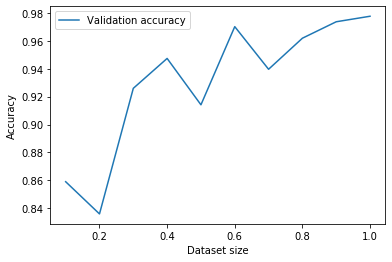

In [26]:
x = np.arange(0.1, 1.1, 0.1)
plt.plot(x, val, label='Validation accuracy')
# plt.plot(x, test, label='Test accuracy')
plt.legend()
plt.xlabel("Dataset size")
plt.ylabel("Accuracy")
plt.show()

In [40]:
model = RandomForestClassifier(n_estimators=150)
model.fit(np.vstack((X_train, X_validation, X_test)), np.hstack((y_train, y_validation, y_test)))
joblib.dump(model, '../Models/RF_Classification_Rolling_FFill_MinMax.joblib')

['../Models/RF_Classification_Rolling_FFill_MinMax.joblib']